In [36]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file=genius.json()
json_file

data_file = open("genius.csv", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Day", "Temp", "Description"])

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json

a=json["properties"]["periods"]
a

for i in a:
    day=i["name"]
    temp=i["temperature"]
    detail=i["detailedForecast"]
    csv_writer.writerow([day,temp, detail])
    
data_file.close()
    

In [37]:
sheet=pd.read_csv("genius.csv")
sheet

,Day,Temp,Description
0,Tonight,30,A slight chance of snow showers after 5am. Par...
1,Tuesday,55,A slight chance of snow showers before 7am. Mo...
2,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
3,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
6,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
7,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
8,Friday Night,34,"A chance of rain before 1am, then a chance of ..."
9,Saturday,44,"Rain and snow likely. Mostly cloudy, with a hi..."


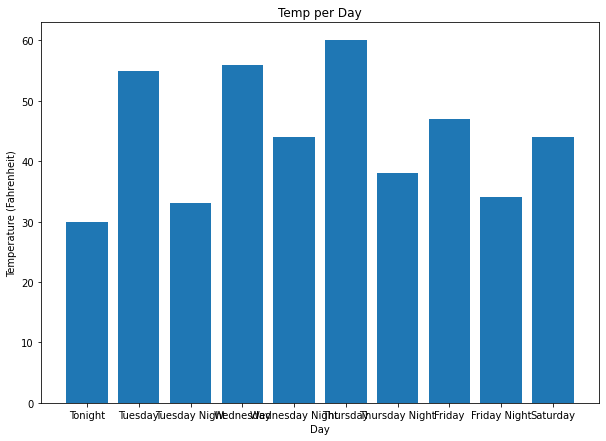

In [38]:
df = pd.DataFrame(sheet)

day1=df["Day"]
temp1=df["Temp"]

fig=plt.figure(figsize= (10, 7))
plt.bar(day1[0:10],temp1[0:10])

plt.xlabel("Day")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("Temp per Day")

plt.show()

In [54]:
country_code = "US"
year=2013

#Call 1: Retrieve info of given country
info = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{country_code}")
print(info.json())


#Call 2: Retrieve all availale country codes
available = requests.get("https://date.nager.at/api/v3/AvailableCountries")
print(available.json())

#Call 3: Get long weekends for a given country
weekend= requests.get(f"https://date.nager.at/api/v3/Longweekend/{year}/{country_code}")
print(weekend.json())


#Call 4: Retrieve all holidays for the given country and year
holiday = requests.get(f"https://date.nager.at/api/v3/publicholidays/{year}/{country_code}")
print(holiday.json())

#Call 5: Checks if today is a public holiday
today = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{country_code}")
print(today.status_code)

#Call 6: Retrieve all public holidays for the next 365 days
nextt=requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{country_code}")
print(nextt.json())

#Call 7: Retrieve upcoming holidays for the next 7 days
worldwide = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
print(worldwide.json())


{'commonName': 'United States', 'officialName': 'United States of America', 'countryCode': 'US', 'region': 'Americas', 'borders': [{'commonName': 'Canada', 'officialName': 'Canada', 'countryCode': 'CA', 'region': 'Americas', 'borders': None}, {'commonName': 'Mexico', 'officialName': 'United Mexican States', 'countryCode': 'MX', 'region': 'Americas', 'borders': None}]}
[{'countryCode': 'AD', 'name': 'Andorra'}, {'countryCode': 'AL', 'name': 'Albania'}, {'countryCode': 'AR', 'name': 'Argentina'}, {'countryCode': 'AT', 'name': 'Austria'}, {'countryCode': 'AU', 'name': 'Australia'}, {'countryCode': 'AX', 'name': 'Åland Islands'}, {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'}, {'countryCode': 'BB', 'name': 'Barbados'}, {'countryCode': 'BE', 'name': 'Belgium'}, {'countryCode': 'BG', 'name': 'Bulgaria'}, {'countryCode': 'BJ', 'name': 'Benin'}, {'countryCode': 'BO', 'name': 'Bolivia'}, {'countryCode': 'BR', 'name': 'Brazil'}, {'countryCode': 'BS', 'name': 'Bahamas'}, {'countryCode': 

In [56]:
country_codes= ['US','GB','FR','PT', 'KR', 'JP', 'ES', 'AU', 'BR', 'CN']

total_holidays= 0

for country_code in country_codes:
    response = requests.get(f"https://date.nager.at/api/v3/publicholidays/2023/{country_code}")
    num_holidays=len(response.json())
    total_holidays += num_holidays
    print(f"{country_code}; {num_holidays} holidays")
    
print(f"Total number of holidays across all countries: {total_holidays}")

US; 13 holidays
GB; 16 holidays
FR; 11 holidays
PT; 17 holidays
KR; 15 holidays
JP; 16 holidays
ES; 34 holidays
AU; 21 holidays
BR; 14 holidays
CN; 7 holidays
Total number of holidays across all countries: 164
